<a href="https://colab.research.google.com/github/Supratik27/Google_Colab_notebook/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will apply the Decision Tree classifier to the iris dataset**

---



we will import the necessary Python packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


We will download the iris dataset from its weblink as follows:

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, we will assign the column names to the dataset as follows:

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we will read the dataset using the Pandas data frame as follows:

In [ ]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

Now, observing the data.

In [ ]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We will implement the very basic step of data preprocessing.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we will divide the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

We will do the data scaling with Scikit learn StandardScaler function

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now we will train the model with Decision tree classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Now, we will make the prediction, which can be done in the following way:

In [ ]:
y_pred = classifier.predict(X_test)

Now we will print the results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  2 21]]


We will print the confusion matrix in heatmap form with the help of seaborn library

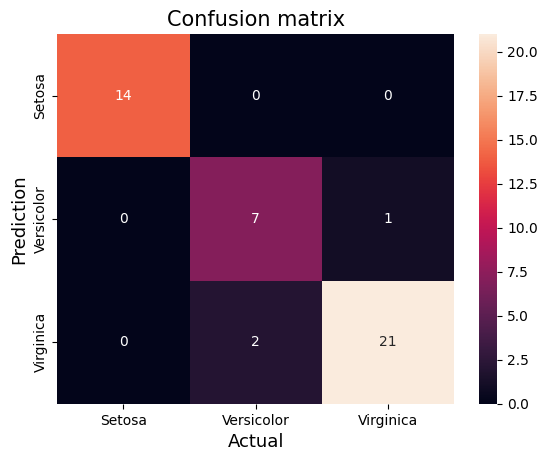

In [ ]:
sns.heatmap(result,
            annot=True,
            fmt="g",
            xticklabels=["Setosa","Versicolor","Virginica"],
            yticklabels=["Setosa","Versicolor","Virginica"])
plt.ylabel("Prediction",fontsize=13)
plt.xlabel("Actual",fontsize=13)
plt.title("Confusion matrix",fontsize=15)
plt.show()

In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.78      0.88      0.82         8
 Iris-virginica       0.95      0.91      0.93        23

       accuracy                           0.93        45
      macro avg       0.91      0.93      0.92        45
   weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


We have achieved 93.33% accuracy using decision tree classifier in *prediction*